# 数据查看与分析

这个notebook用于查看和分析ADS1110的数据。

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 设置中文显示
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

In [3]:
# 读取数据文件
df = pd.read_csv('data/ads_20250402_184101_614.csv')

# 删除最后一列
df = df.iloc[:, :-1]

# 重命名列名
df.columns = ['timestamp', 'voltage']

# 将时间戳转换为datetime类型
df['timestamp'] = pd.to_datetime(df['timestamp'])



# 显示数据基本信息
print("数据基本信息：")
print(df.info())

# 显示前几行数据
print("\n数据预览：")
display(df.head())

数据基本信息：
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3873 entries, 0 to 3872
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype              
---  ------     --------------  -----              
 0   timestamp  3873 non-null   datetime64[ns, UTC]
 1   voltage    3873 non-null   float64            
dtypes: datetime64[ns, UTC](1), float64(1)
memory usage: 60.6 KB
None

数据预览：


,timestamp,voltage
0,2025-04-02 18:41:02.734000+00:00,1.125
1,2025-04-02 18:41:03.735000+00:00,1.125
2,2025-04-02 18:41:04.735000+00:00,1.125
3,2025-04-02 18:41:05.735000+00:00,1.125
4,2025-04-02 18:41:06.735000+00:00,1.125


In [4]:
# 数据统计描述
print("数据统计描述：")
display(df.describe())

数据统计描述：


,voltage
count,3873.000000
mean,1.162616
std,0.267842
min,1.125000
25%,1.125000
50%,1.125000
75%,1.125000
max,7.125000


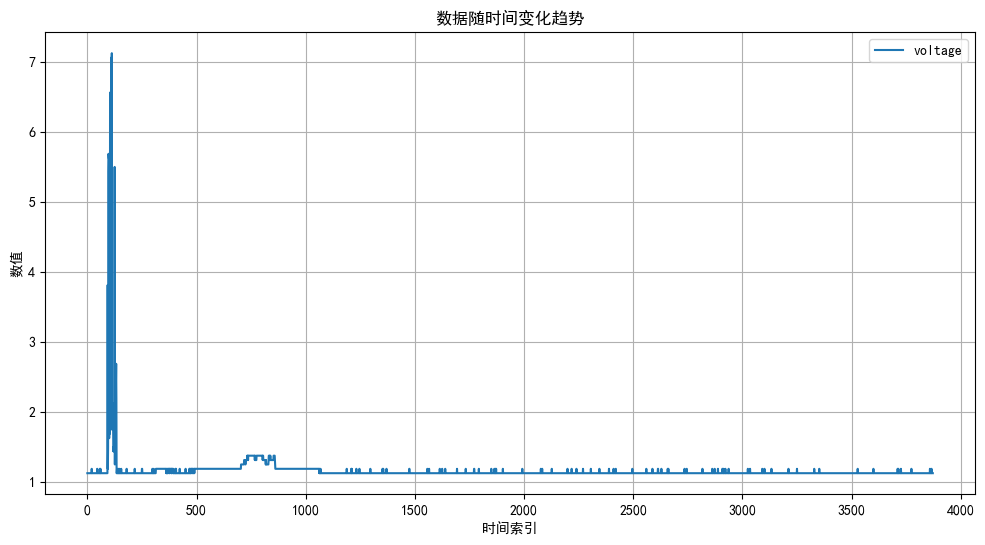

In [5]:
# 绘制数据分布图
plt.figure(figsize=(12, 6))
for column in df.select_dtypes(include=['float64', 'int64']).columns:
    plt.plot(df.index, df[column], label=column)
plt.title('数据随时间变化趋势')
plt.xlabel('时间索引')
plt.ylabel('数值')
plt.legend()
plt.grid(True)
plt.show()

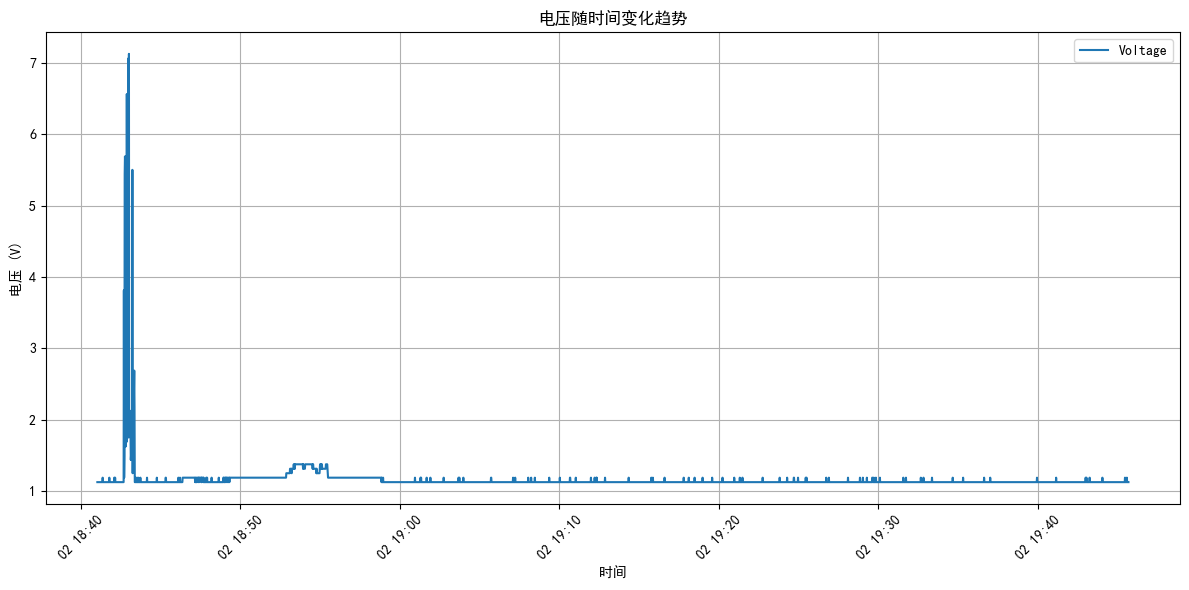

In [6]:
# 绘制voltage随时间变化的折线图
plt.figure(figsize=(12, 6))
plt.plot(df['timestamp'], df['voltage'], label='Voltage')
plt.title('电压随时间变化趋势')
plt.xlabel('时间')
plt.ylabel('电压 (V)')
plt.legend()
plt.grid(True)

# 旋转x轴标签以防重叠
plt.xticks(rotation=45)

# 自动调整布局
plt.tight_layout()
plt.show()


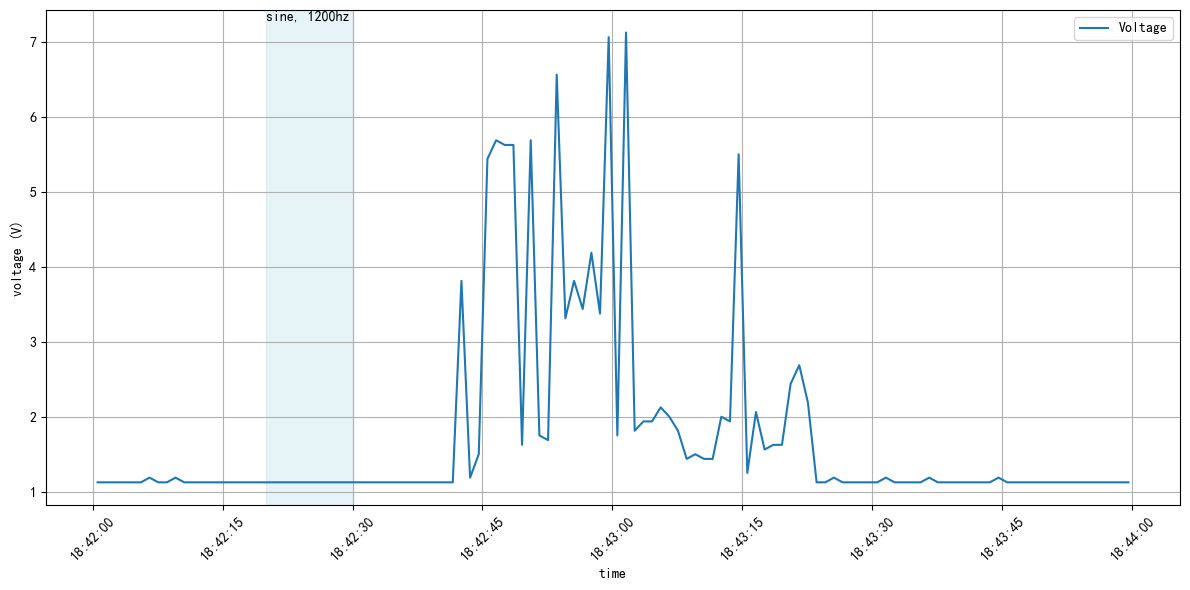

In [7]:
# 筛选18:50之前的数据
df_before_1850 = df[(df['timestamp'].dt.hour < 18) | ((df['timestamp'].dt.hour == 18) & (df['timestamp'].dt.minute >= 42))& (df['timestamp'].dt.minute < 44)]

# 绘制筛选后的数据
plt.figure(figsize=(12, 6))
plt.plot(df_before_1850['timestamp'], df_before_1850['voltage'], label='Voltage')
plt.xlabel('time')
plt.ylabel('voltage (V)')
plt.legend()
plt.grid(True)

# 绘制一条新的标注线，使用不同的颜色
start_time = pd.Timestamp('2025-04-02 18:42:20')
end_time = start_time + pd.Timedelta(seconds=10)

# 绘制标注线
plt.axvspan(start_time, end_time, color='lightblue', alpha=0.3)
plt.text(start_time, plt.ylim()[1], 'sine, 1200hz', 
        verticalalignment='top')

# 旋转x轴标签以防重叠
plt.xticks(rotation=45)

# 自动调整布局
plt.tight_layout()
plt.show()


In [13]:
# 读取数据文件
df = pd.read_csv('data/ads_20250410_205248_390.csv')

# 重命名列名
df.columns = ['timestamp', 'voltage']

# 将时间戳转换为datetime类型
df['timestamp'] = pd.to_datetime(df['timestamp'])



# 显示数据基本信息
print("数据基本信息：")
print(df.info())

# 显示前几行数据
print("\n数据预览：")
display(df.head())

数据基本信息：
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2328 entries, 0 to 2327
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype              
---  ------     --------------  -----              
 0   timestamp  2328 non-null   datetime64[ns, UTC]
 1   voltage    2328 non-null   float64            
dtypes: datetime64[ns, UTC](1), float64(1)
memory usage: 36.5 KB
None

数据预览：


,timestamp,voltage
0,2025-04-10 21:00:19.873000+00:00,6.958008
1,2025-04-10 21:00:20.874000+00:00,6.958008
2,2025-04-10 21:00:21.872000+00:00,6.591796
3,2025-04-10 21:00:22.874000+00:00,6.958008
4,2025-04-10 21:00:23.874000+00:00,6.958008


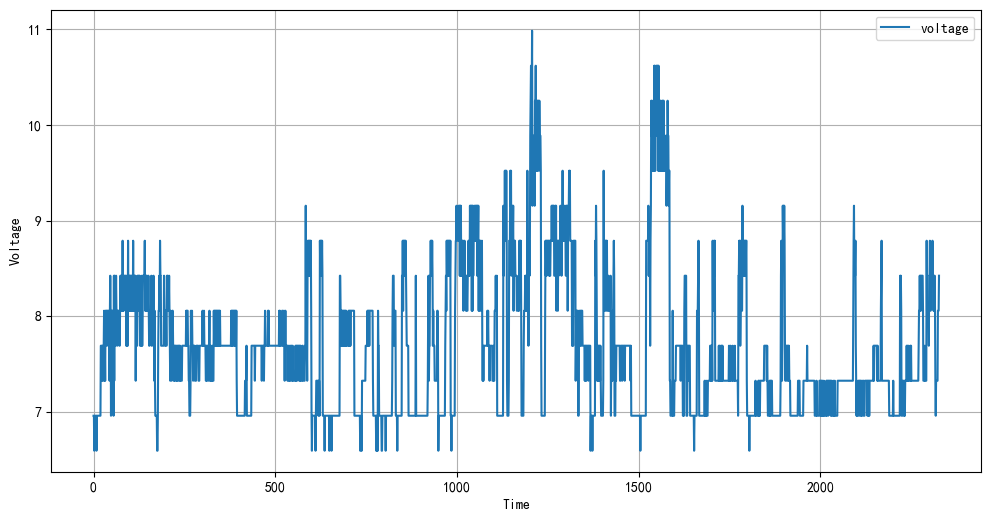

In [14]:
# 绘制数据分布图
plt.figure(figsize=(12, 6))
for column in df.select_dtypes(include=['float64', 'int64']).columns:
    plt.plot(df.index, df[column], label=column)
plt.xlabel('Time')
plt.ylabel('Voltage')
plt.legend()
plt.grid(True)
plt.show()